In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as fit

In [34]:
#1a
data = pd.read_csv('GlobalLandTemperaturesByState.csv')
filtered_data = data.loc[:, ['dt','AverageTemperature','State']]
filtered_data['dt'] = pd.to_datetime(filtered_data['dt'])
after_2000 = filtered_data[filtered_data['dt'].dt.year > 2000]
select_states = after_2000[after_2000['State'].isin(['Wyoming', 'Nebraska', 'South Dakota'])]
select_states

,dt,AverageTemperature,State
350773,2001-01-01,-2.592,Nebraska
350774,2001-02-01,-5.575,Nebraska
350775,2001-03-01,2.077,Nebraska
350776,2001-04-01,10.431,Nebraska
350777,2001-05-01,15.878,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [35]:
#1b
average_temp_data = select_states.groupby('dt', as_index=False)['AverageTemperature'].mean()
average_temp_data

,dt,AverageTemperature
0,2001-01-01,-4.480333
1,2001-02-01,-7.541000
2,2001-03-01,0.590333
3,2001-04-01,7.889000
4,2001-05-01,13.908667
...,...,...
148,2013-05-01,13.196000
149,2013-06-01,18.783667
150,2013-07-01,22.110333
151,2013-08-01,21.890000


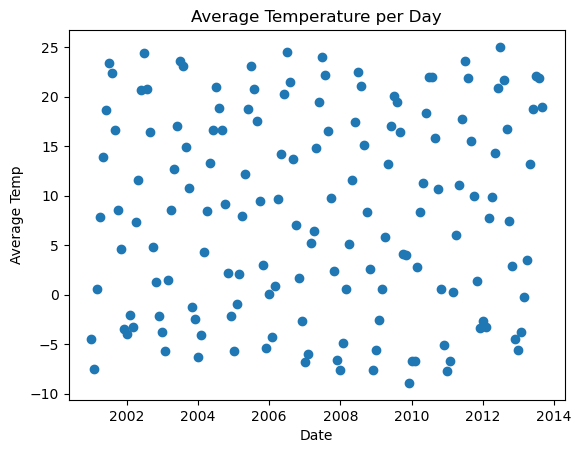

In [36]:
#1c
plt.figure()
plt.scatter(average_temp_data['dt'], average_temp_data['AverageTemperature'])
plt.title("Average Temperature per Day")
plt.xlabel("Date")
plt.ylabel("Average Temp")
plt.show()

In [46]:
#1d
average_temp_data['DateNumeric'] = average_temp_data['dt'].apply(lambda x: x.timestamp())
average_temp_data

,dt,AverageTemperature,DateNumeric
0,2001-01-01,-4.480333,9.783072e+08
1,2001-02-01,-7.541000,9.809856e+08
2,2001-03-01,0.590333,9.834048e+08
3,2001-04-01,7.889000,9.860832e+08
4,2001-05-01,13.908667,9.886752e+08
...,...,...,...
148,2013-05-01,13.196000,1.367366e+09
149,2013-06-01,18.783667,1.370045e+09
150,2013-07-01,22.110333,1.372637e+09
151,2013-08-01,21.890000,1.375315e+09


In [47]:
#1e
def func(x, m, a, b):
    return m * (x - a) + b

p0 = [1,2,3]

par, cov = fit.curve_fit(func, average_temp_data['DateNumeric'], average_temp_data['AverageTemperature'], p0)

/var/folders/qp/f1w5q3_s6xq_r279nkc7kmkr0000gn/T/ipykernel_60774/181667176.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  par, cov = fit.curve_fit(func, average_temp_data['DateNumeric'], average_temp_data['AverageTemperature'], p0)
